Set Up For Learning

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2. GET DATA

In [2]:
import pandas as pd
classic_hits=pd.read_csv("ClassicHits.csv")
classic_hits.dtypes

Track                object
Artist               object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Genre                object
dtype: object

In [3]:
classic_hits.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


Checking for any duplicate data

In [4]:
classic_hits.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15145    False
15146    False
15147    False
15148    False
15149    False
Length: 15150, dtype: bool

In [5]:
#most of the data in the above dataframe is not duplicated and in order to correctly know about no of duplicates i used sum() function
print(f" no of duplicated rows:{classic_hits.duplicated().sum()}")

 no of duplicated rows:1


In [6]:
classic_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [7]:
classic_hits.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


Histogram representation for each numeric data in dataset(Year,duration,time_signature,danceability,energy,key,loudness,mode,speechiness etc)

Saving figure classic_hits_attribute_histplot


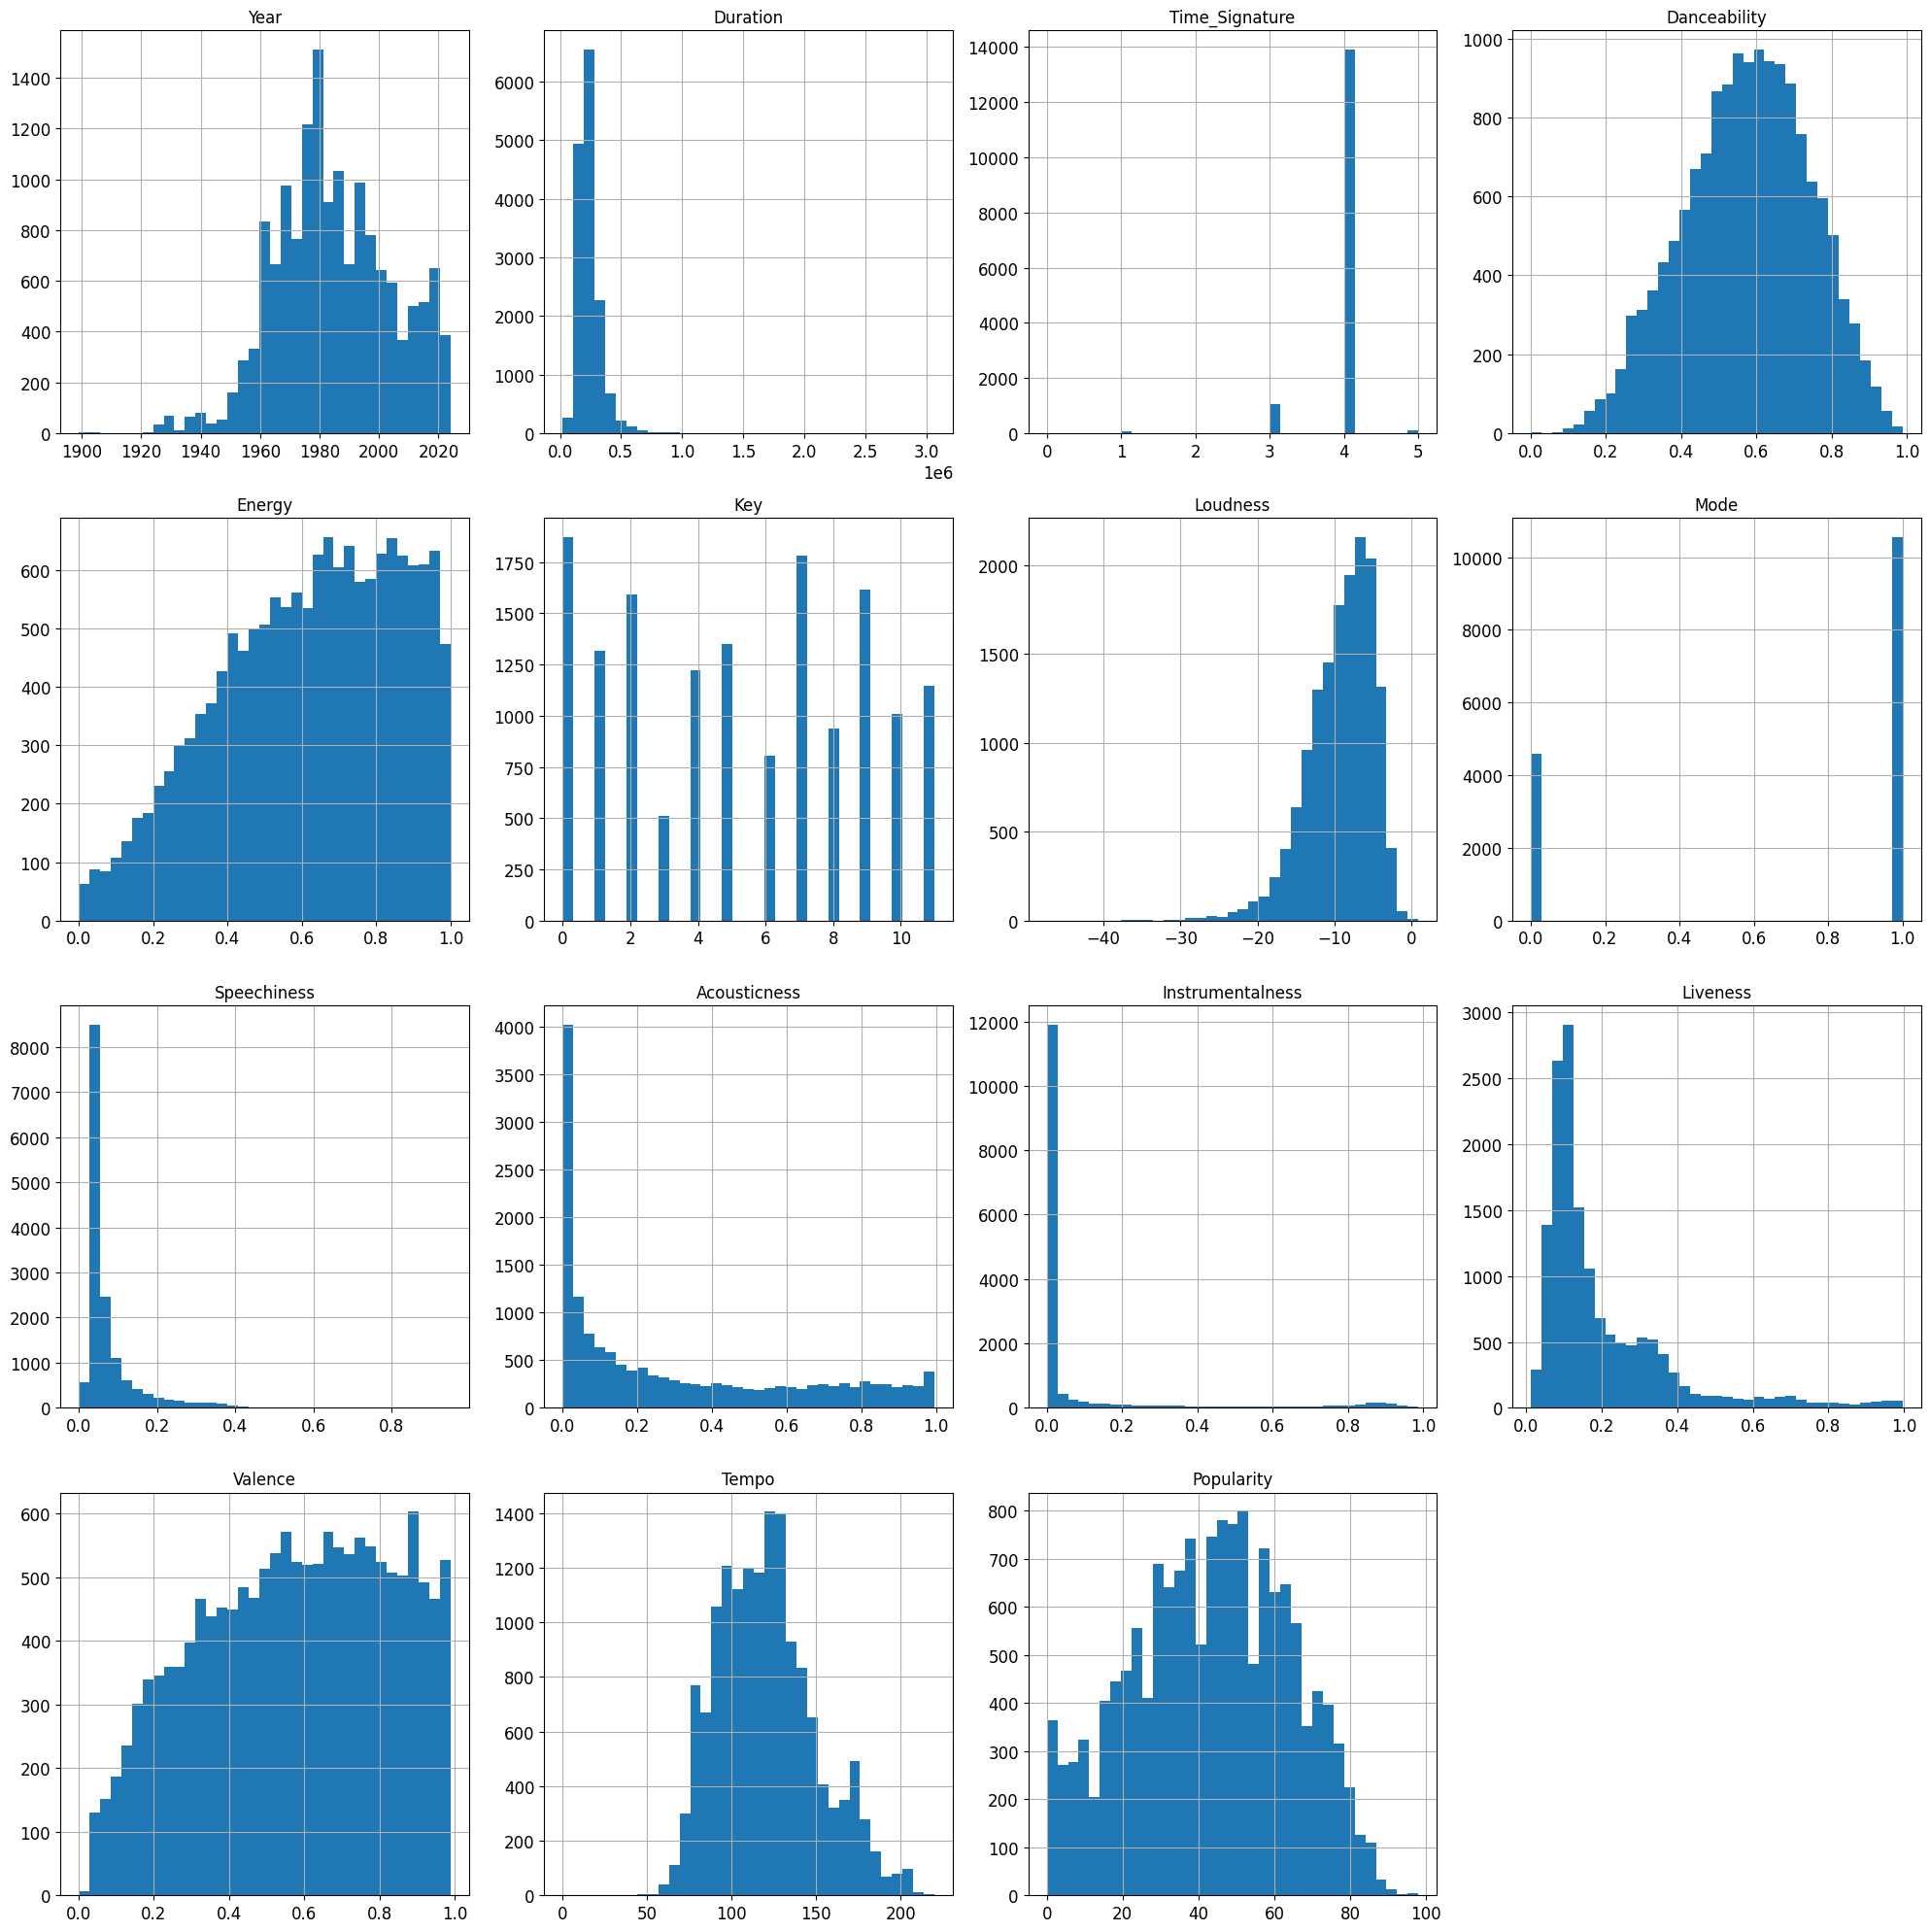

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
classic_hits.hist(bins=35,figsize=(20,20))
save_fig("classic_hits_attribute_histplot")

Creating testing dataset

In [9]:
from sklearn.model_selection import train_test_split
#classic_train,classic_test=train_test_split(classic_hits, test_size=0.2, random_state=42)#20% data for testing and 80% for training.
#  OR detailed implementation of creating train and test datasets.
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
classic_train,classic_test=split_train_test(classic_hits, 0.2)    
print(f"Training set size: {len(classic_train)}")
print(f"Test set size: {len(classic_test)}")

Training set size: 12120
Test set size: 3030


In [10]:
classic_train.head(10)

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
10037,Telstar,the Tornados,1963,202000,4,0.237,0.777,9,-7.347,1,0.0421,0.00174,0.832000,0.1070,0.677,145.956,29,Pop
2393,Headline News,Carol Douglas,1978,312040,4,0.658,0.707,9,-13.651,1,0.0377,0.01390,0.001470,0.0918,0.881,117.663,5,Disco
1693,Heartbreak Hotel,Elvis Presley,1956,127560,4,0.696,0.210,4,-11.922,1,0.0670,0.84000,0.000002,0.1070,0.717,93.543,58,Country
13736,Black Water,The Doobie Brothers,1974,255000,4,0.532,0.441,2,-12.866,1,0.0434,0.22800,0.000000,0.0846,0.670,169.275,61,Rock
8442,01-02-2003,Len Barry,1965,59000,4,0.841,0.408,0,-9.193,1,0.0366,0.72200,0.000000,0.1020,0.965,89.860,62,Pop
12162,EdEddnEddy,JID,2018,140511,4,0.769,0.405,0,-9.591,1,0.4010,0.14100,0.007100,0.3780,0.341,157.982,57,Rap
11307,"Let's Go,Let's Go,Let's Go",Hank Ballard & The Midnighters,1959,142306,4,0.606,0.811,8,-4.791,1,0.0369,0.07490,0.000002,0.0932,0.903,129.304,7,R&B
5796,Bored to Tears,Black Label Society,2003,268973,4,0.362,0.937,1,-7.443,0,0.1610,0.00117,0.000500,0.3320,0.333,165.189,31,Metal
4563,Walk On By,Thundercat,2017,199136,4,0.825,0.302,8,-11.651,1,0.2820,0.20400,0.000000,0.0762,0.747,94.956,62,Funk
5470,"Bitches Brew (feat. Wayne Shorter,Bennie Maupi...",Miles Davis,1970,1619373,4,0.351,0.514,10,-9.092,0,0.0349,0.52100,0.277000,0.1000,0.172,99.133,36,Jazz


In [11]:
classic_test.head(5)

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
2438,I Don't Want to Change You,Crown Heights Affair,1979,318946,4,0.772,0.819,2,-8.289,1,0.0632,0.0101,0.0879,0.0394,0.885,116.938,17,Disco
9403,Wannabe,Spice Girls,1997,173000,4,0.768,0.864,11,-6.149,1,0.0324,0.1010,0.0000,0.1620,0.891,110.009,80,Pop
1461,Little Red Rooster,Willie Dixon,1961,215026,4,0.584,0.278,4,-18.566,1,0.0312,0.5500,0.2100,0.2550,0.750,81.712,42,Blues
2451,The Shadow of Your Smile,D-Train,1981,406040,4,0.763,0.720,6,-12.251,0,0.0594,0.0139,0.4530,0.0501,0.748,112.854,24,Disco
13943,Blackboard Jungle Dub - Version 1,"Lee ""Scratch"" Perry",1973,278560,4,0.524,0.236,4,-19.892,0,0.1060,0.8630,0.8060,0.5500,0.517,181.134,20,SKA


Text(0, 0.5, 'frequency')

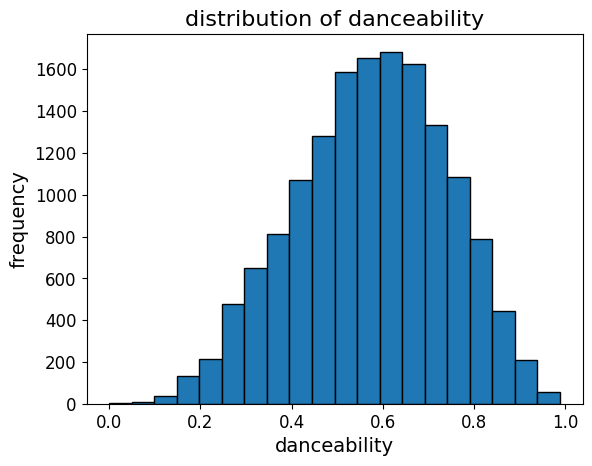

In [12]:
plt.hist(classic_hits["Danceability"], bins=20,edgecolor="black")
plt.title('distribution of danceability', fontsize=16)
plt.xlabel('danceability')
plt.ylabel('frequency')

In [13]:
classic_hits["popular_range"]=pd.cut(classic_hits["Popularity"],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[1,2,3,4,5,6,7,8,9,10])
classic_hits["popular_range"] = classic_hits["popular_range"].fillna(1)

In [14]:
classic_hits["popular_range"].value_counts().sum()

np.int64(15150)

Text(0, 0.5, 'frequency')

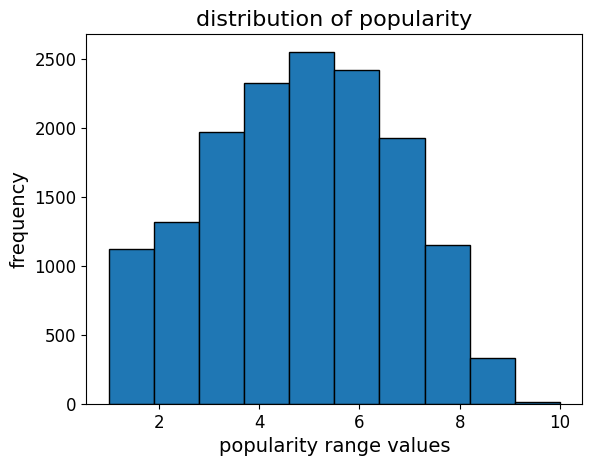

In [15]:
plt.hist(classic_hits["popular_range"], bins=10,edgecolor="black")
plt.title('distribution of popularity', fontsize=16)
plt.xlabel('popularity range values')
plt.ylabel('frequency')

In [16]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# for train_index,test_index in split.split(classic_hits,classic_hits["popular_range"]):
#     strat_train_set=classic_hits.loc[train_index]
#     strat_test_set=classic_hits.loc[test_index]

# print("Training set popularity range distribution:")
# print(strat_train_set["popular_range"].value_counts()/len(strat_train_set))

# print("Test set popularity range distribution:")
# print(strat_test_set["popular_range"].value_counts()/len(strat_test_set))

In [17]:
# def popular_range_proportions(data):
#     return data["popular_range"].value_counts() / len(data)
# train_set, test_set = train_test_split(classic_hits, test_size=0.2, random_state=42)
# compare_props = pd.DataFrame({
#     "Overall": popular_range_proportions(classic_hits),
#     "Stratified": popular_range_proportions(strat_test_set),
#     "Random": popular_range_proportions(test_set),
# }).sort_index()
# compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
# compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
# compare_props

In [18]:
# for setcol in (strat_train_set, strat_test_set):
#     setcol.drop("popular_range", axis=1, inplace=True)

Data Visualization

In [19]:
hits=classic_train.copy()

In [20]:
high_popular_tracks=hits.loc[hits.groupby('Genre')['Popularity'].idxmax()] 

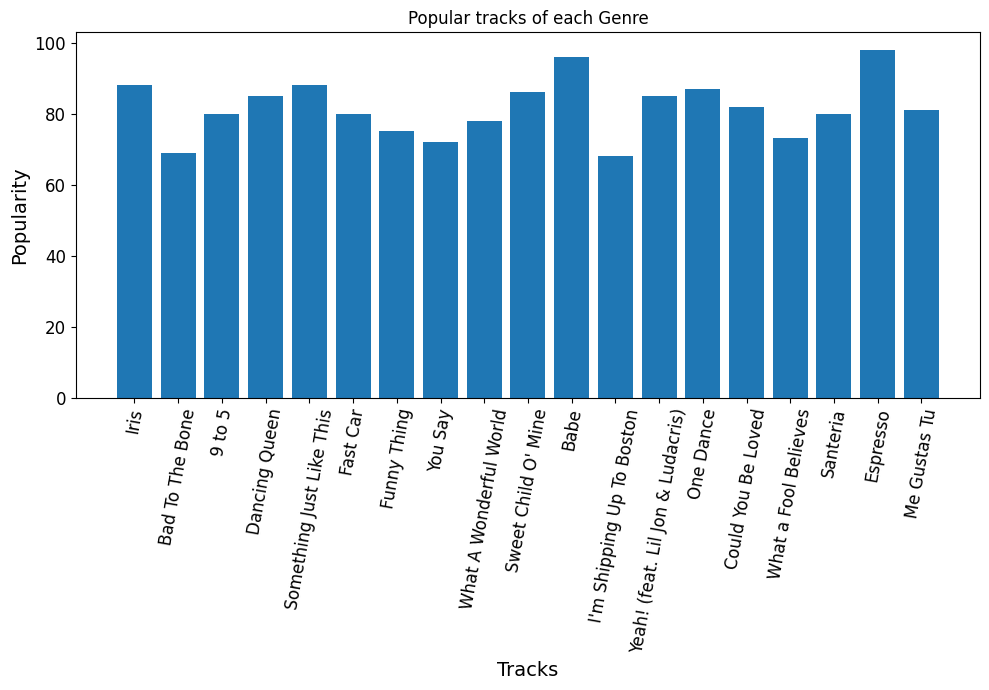

In [21]:
plt.figure(figsize=(10,7))
plt.bar(high_popular_tracks['Track'],high_popular_tracks['Popularity']) 
plt.ylabel('Popularity') 
plt.xlabel('Tracks') 
plt.title('Popular tracks of each Genre') 
plt.xticks(rotation=80)
plt.tight_layout()

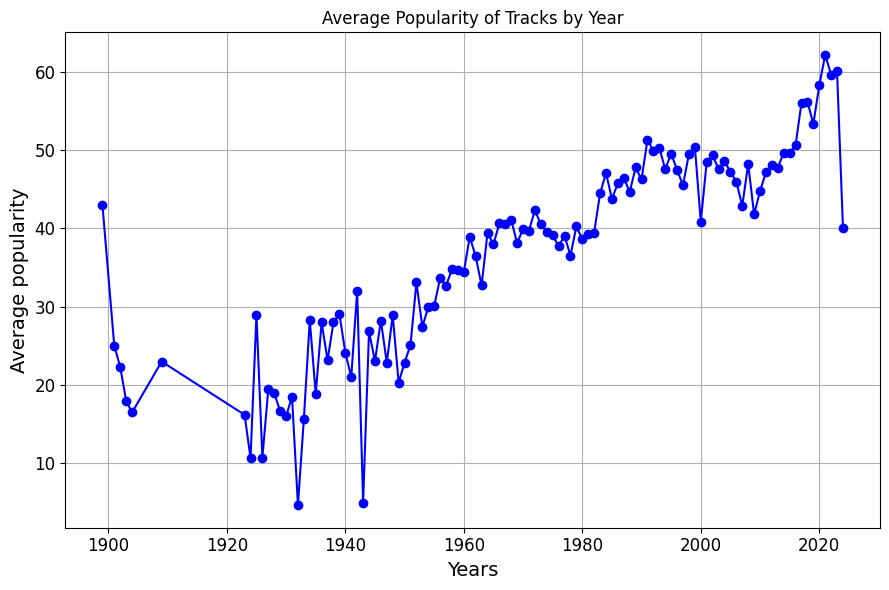

In [22]:
yearly_popularity = classic_hits.groupby('Year')['Popularity'].mean()
plt.figure(figsize=(9,6))
plt.plot(yearly_popularity.index,yearly_popularity.values,color='blue',marker='o')
plt.title('Average Popularity of Tracks by Year')
plt.xlabel('Years')
plt.ylabel('Average popularity')
plt.grid(True)
plt.tight_layout()

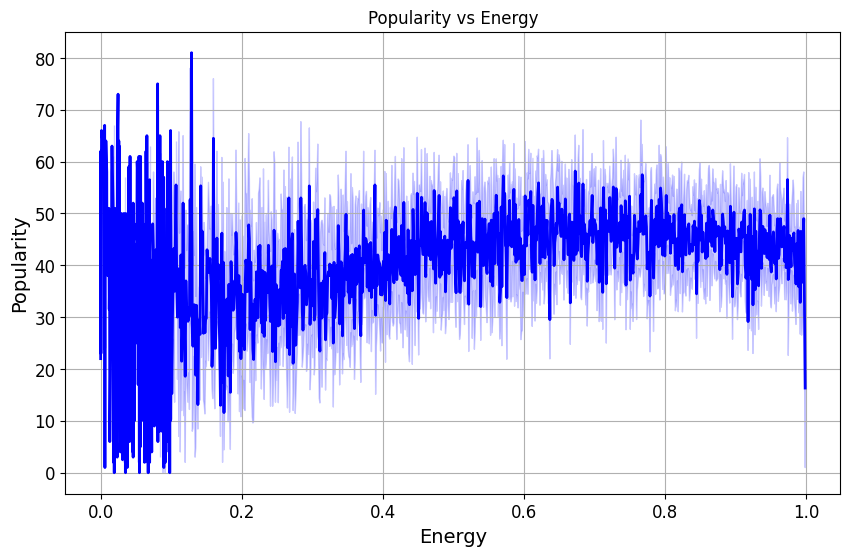

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(x=classic_hits['Energy'],y=classic_hits['Popularity'],color='blue',linewidth=2)
plt.title('Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True)

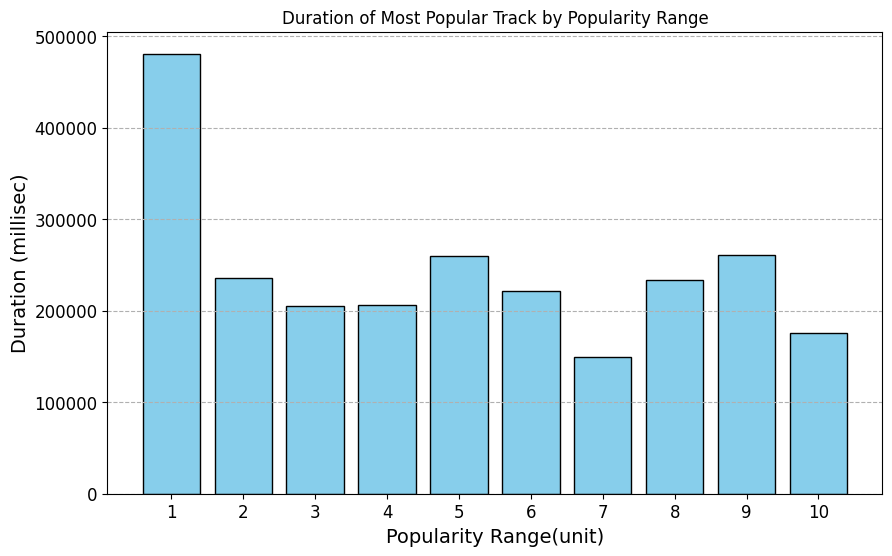

In [24]:
most_popular_per_range = classic_hits.loc[classic_hits.groupby('popular_range',observed=False)['Popularity'].idxmax()]
#Sorting by popularity range for better plotting.
most_popular_per_range = most_popular_per_range.sort_values('popular_range')
plt.figure(figsize=(10,6))
plt.bar(most_popular_per_range['popular_range'].astype(str),most_popular_per_range['Duration'],color='skyblue',edgecolor='black')
plt.title('Duration of Most Popular Track by Popularity Range')
plt.xlabel('Popularity Range(unit)')
plt.ylabel('Duration (millisec)')
plt.grid(axis='y',linestyle='--')

finding Correlation

In [25]:
val=hits.select_dtypes(include=[np.number])
corr_matrix=val.corr()

In [26]:
corr_matrix["Popularity"].sort_values(ascending=False)

Popularity          1.000000
Year                0.313488
Loudness            0.247523
Energy              0.150426
Danceability        0.130238
Speechiness         0.061855
Time_Signature      0.059876
Tempo               0.009472
Key                 0.005780
Valence            -0.054017
Mode               -0.059989
Duration           -0.082363
Liveness           -0.100880
Instrumentalness   -0.167979
Acousticness       -0.219623
Name: Popularity, dtype: float64

Saving figure scatter_matrix_plot


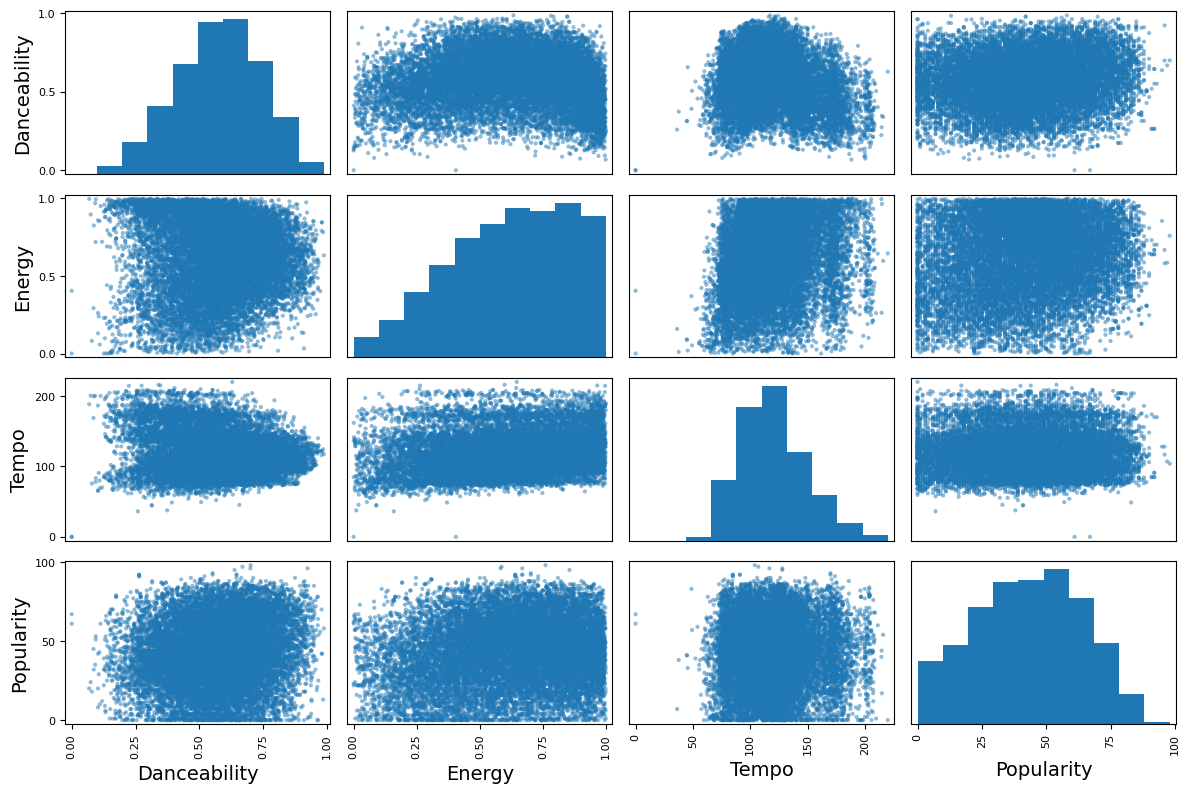

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["Danceability","Energy","Tempo","Popularity"]
scatter_matrix(classic_hits[attributes],figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure popularity_vs_danceability_scatterplot


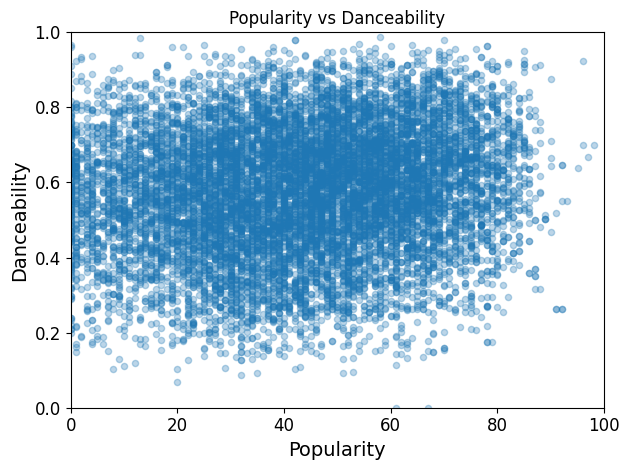

In [28]:
hits.plot(kind="scatter", x="Popularity", y="Danceability", alpha=0.3)
plt.axis([0, 100, 0, 1])
plt.title('Popularity vs Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
save_fig("popularity_vs_danceability_scatterplot")

Experimenting with Attribute Combinations

In [29]:
classic_hits["danceability_per_energy"] = classic_hits["Danceability"] / classic_hits["Energy"]
classic_hits["energy_per_tempo"] = classic_hits["Energy"] / classic_hits["Tempo"]
classic_hits["popularity_per_duration"] = classic_hits["Popularity"] / classic_hits["Duration"]

In [30]:
corr_with_popularity = corr_matrix["Popularity"].sort_values(ascending=False)
print(corr_with_popularity)

Popularity          1.000000
Year                0.313488
Loudness            0.247523
Energy              0.150426
Danceability        0.130238
Speechiness         0.061855
Time_Signature      0.059876
Tempo               0.009472
Key                 0.005780
Valence            -0.054017
Mode               -0.059989
Duration           -0.082363
Liveness           -0.100880
Instrumentalness   -0.167979
Acousticness       -0.219623
Name: Popularity, dtype: float64


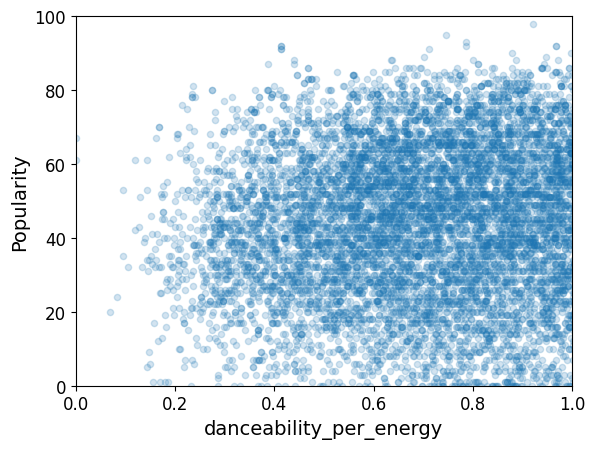

In [31]:
classic_hits.plot(kind="scatter", x="danceability_per_energy", y="Popularity",
                  alpha=0.2)
plt.axis([0, 1, 0, 100])
plt.show()

In [32]:
classic_hits.describe()

C:\Users\AISWARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,danceability_per_energy,energy_per_tempo,popularity_per_duration
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,1.515000e+04,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809,1.526547,inf,0.000203
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038,13.864985,NaN,0.000125
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000,0.000000,1.152694e-06,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000,0.676790,3.713120e-03,0.000112
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000,0.964897,5.308869e-03,0.000192
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000,1.391209,6.815587e-03,0.000276
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000,1289.662231,inf,0.002000


Prepare the Data for Machine Learning Algorithms

In [33]:
#preparing training and testing datasets
X=classic_train[['Duration','Danceability','Energy','Instrumentalness','Liveness']]
y=classic_train['Popularity']


DATA CLEANING

In [34]:
#checking for null values
X.isnull().any()

Duration            False
Danceability        False
Energy              False
Instrumentalness    False
Liveness            False
dtype: bool

In [35]:
y.isnull().any()

np.False_

Handling Text and Categorical Attributes

In [36]:
hits_category=hits[["Track"]]
hits_category.head(10)

,Track
10037,Telstar
2393,Headline News
1693,Heartbreak Hotel
13736,Black Water
8442,01-02-2003
12162,EdEddnEddy
11307,"Let's Go,Let's Go,Let's Go"
5796,Bored to Tears
4563,Walk On By
5470,"Bitches Brew (feat. Wayne Shorter,Bennie Maupi..."


Select and Train a Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
predict_popularity=lin_reg.predict(X_test_scaled)

Model evaluation

In [38]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
# Evaluating the model(predicted values) using test set values(popularity)
mae = mean_absolute_error(y_test,predict_popularity)
mse = mean_squared_error(y_test,predict_popularity)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predict_popularity)

print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R-squared (R²):",r2)

Mean Absolute Error (MAE): 16.54133245105597
Mean Squared Error (MSE): 400.414812570662
Root Mean Squared Error (RMSE): 20.01036762707427
R-squared (R²): 0.060013388639485576


In [39]:
#coefficients of the model
print("\nCoefficients:",lin_reg.coef_)
print("Intercept:",lin_reg.intercept_)


Coefficients: [-1.10929842  2.00811437  3.45355465 -2.81743824 -2.28063484]
Intercept: 43.12180280528053


Better Evaluation Using Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#cross-validation for R-squared
r2_scores = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=5)
print(f"R-squared (R²) scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}\n")

#cross-validation for Mean Absolute Error (MAE)
neg_mae_scores = cross_val_score(lin_reg, X_train, y_train, scoring=neg_mae_scorer, cv=5)
mae_scores = -neg_mae_scores  # Convert negative MAE to positive values
print(f"MAE scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}\n")

#cross-validation for Mean Squared Error (MSE)
neg_mse_scores = cross_val_score(lin_reg, X_train, y_train, scoring=neg_mse_scorer, cv=5)
mse_scores = -neg_mse_scores  # Convert negative MSE to positive values
print(f"MSE scores: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}\n")

#RMSE from cross-validation MSE scores
rmse_scores = np.sqrt(mse_scores)
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

R-squared (R²) scores: [0.0802558  0.05867963 0.05396388 0.08023676 0.09760152]
Mean R²: 0.07414751793067823

MAE scores: [16.66197548 16.29731533 16.44658082 16.83669399 16.58357392]
Mean MAE: 16.565227908498663

MSE scores: [405.64068861 393.79997267 395.33346577 414.71924092 399.6724425 ]
Mean MSE: 401.8331620942211

RMSE scores: [20.14052354 19.84439399 19.88299439 20.36465666 19.99180939]
Mean RMSE: 20.044875592464848


Fine Tuning

Fine-Tuning using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False],         # Whether to copy X or overwrite it
    'positive': [True, False]        # Force coefficients to be positive
}

#GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters combination found: ", best_params)

Best hyperparameters combination found:  {'copy_X': True, 'fit_intercept': True, 'positive': False}


Evaluating best model

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions on the scaled test set
y_pred = best_model.predict(X_test_scaled)

#RMSE on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test RMSE of the best model: {rmse}")

Test RMSE of the best model: 20.01036762707427


Cross-Validation on the Best Model

In [48]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the scaled training data
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate RMSE for each fold
cv_rmse = np.sqrt(-cv_scores)
print("Cross-validated RMSE scores for each fold: ", cv_rmse)
print("Average cross-validated RMSE: ", cv_rmse.mean())

Cross-validated RMSE scores for each fold:  [20.14052354 19.84439399 19.88299439 20.36465666 19.99180939]
Average cross-validated RMSE:  20.044875592464845


Pickling the Best Model

In [49]:
import pickle

model_filename = 'best_linear_regression_model.pkl'
scaler_filename = 'scaler.pkl'

# Saving model using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Best model saved as '{model_filename}'")

# Saving scaler using pickle
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print(f"Scaler saved as '{scaler_filename}'")


Best model saved as 'best_linear_regression_model.pkl'
Scaler saved as 'scaler.pkl'
